<a href="https://colab.research.google.com/github/MarufSyamsudin/BigDataAnalisis/blob/main/coba_bda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARY

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn import metrics
from scipy.stats import pearsonr
import seaborn as sns
from seaborn import regplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.stats import kstest, shapiro
from scipy import stats
from PIL import Image

IMPORT DATASET

In [ ]:
df=pd.read_csv('ADRO.csv')
print(df)

       timestamp  open   low  high  close     volume
0     2008-07-16  1500  1500  1760   1730  789786000
1     2008-07-17  1700  1700  1760   1700  383602500
2     2008-07-18  1640  1640  1700   1640   95396000
3     2008-07-21  1680  1640  1690   1680   49749000
4     2008-07-22  1670  1660  1690   1670   29585500
...          ...   ...   ...   ...    ...        ...
3773  2023-01-02  3610  3590  3650   3590   69696600
3774  2023-01-03  3590  3500  3590   3520   95601300
3775  2023-01-04  3540  3300  3560   3300  163804600
3776  2023-01-05  3250  3080  3270   3100  225480200
3777  2023-01-06  3090  3090  3190   3140  133608100

[3778 rows x 6 columns]


EDA

In [ ]:
df.columns

Index(['timestamp', 'open', 'low', 'high', 'close', 'volume'], dtype='object')

In [ ]:
df.describe()

,open,low,high,close,volume
count,3778.000000,3778.000000,3778.000000,3778.000000,3.778000e+03
mean,1547.273425,1519.896771,1573.661726,1545.987030,6.072940e+07
std,679.711946,670.024085,689.409619,680.601818,5.698739e+07
min,440.000000,437.000000,452.000000,437.000000,0.000000e+00
25%,1101.250000,1085.000000,1130.000000,1100.000000,2.619512e+07
50%,1405.000000,1380.000000,1430.000000,1405.000000,4.652895e+07
75%,1875.000000,1850.000000,1898.750000,1870.000000,7.885675e+07
max,4140.000000,4080.000000,4250.000000,4140.000000,7.897860e+08


In [ ]:
df_high = df.sort_values(by=['high'], ascending=False)
df_high.head()

,timestamp,open,low,high,close,volume
3711,2022-10-06,4080,4040,4250,4100,159208200
3696,2022-09-15,4040,4040,4190,4060,120755300
3712,2022-10-07,4100,4080,4170,4140,49875500
3710,2022-10-05,4140,4080,4170,4080,57945800
3689,2022-09-06,4080,4020,4160,4040,107870400


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3778 non-null   object
 1   open       3778 non-null   int64 
 2   low        3778 non-null   int64 
 3   high       3778 non-null   int64 
 4   close      3778 non-null   int64 
 5   volume     3778 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 177.2+ KB


In [ ]:
# Bersihkan data timestamp
df['timestamp'] = df.timestamp.str.extract('(-?\d+)')

In [ ]:
# Menampilkan tipe data kolom sebelum perubahan
print(df['timestamp'].dtype)

object


In [ ]:
# Mengubah tipe data kolom menjadi integer
df['timestamp'] = df['timestamp'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3778 entries, 0 to 3777
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   timestamp  3778 non-null   int64
 1   open       3778 non-null   int64
 2   low        3778 non-null   int64
 3   high       3778 non-null   int64
 4   close      3778 non-null   int64
 5   volume     3778 non-null   int64
dtypes: int64(6)
memory usage: 177.2 KB


In [ ]:
df.isna().sum()

timestamp    0
open         0
low          0
high         0
close        0
volume       0
dtype: int64

Korelasi

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x800 with 0 Axes>

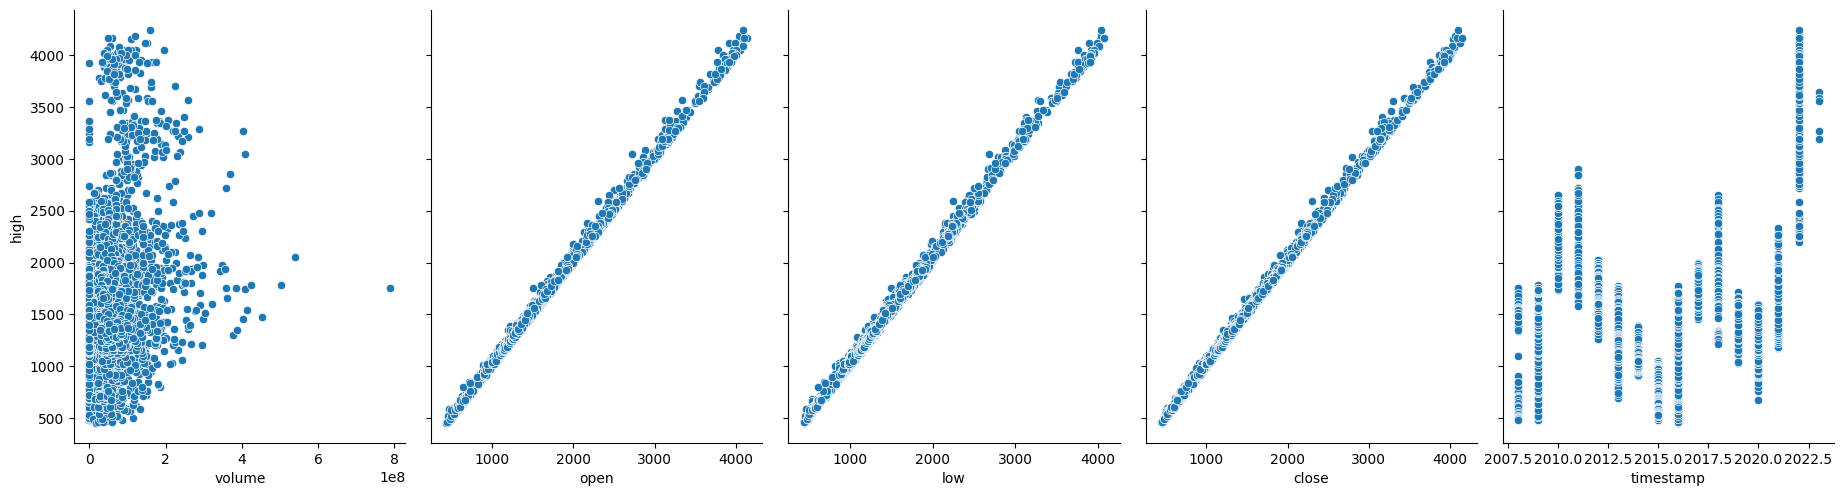

In [ ]:
plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['volume', 'open', 'low', 'close', 'timestamp'], y_vars=['high'], size=5, aspect=0.75)
plt.show

In [ ]:
# Menggunakan uji Shapiro-wilk (shapiro)
data1 = shapiro(df['volume'])
data2 = shapiro(df['high'])

print("Hasil Uji Normalitas pada kolom volume")
print("_____________________________________________")
print(data1)
print("\n\nHasil Uji Normalitas pada kolom high")
print("_____________________________________________")
print(data2)

Hasil Uji Normalitas pada kolom volume
_____________________________________________
ShapiroResult(statistic=0.7884434461593628, pvalue=0.0)


Hasil Uji Normalitas pada kolom high
_____________________________________________
ShapiroResult(statistic=0.9206523299217224, pvalue=9.555173968538063e-41)


In [ ]:
print(stats.spearmanr(df['high'], df['volume']))

SignificanceResult(statistic=0.19269752003571067, pvalue=6.299904637405153e-33)


# **Eksperimen Pertama**
**Menggunakan 4 variabel bebas('Volume', 'Low', 'Open', 'Close')**

In [ ]:
bebas = ['volume','low','open','close']

X1=df[bebas]
y1=df['high']

In [ ]:
X11_train, X11_test, y11_train, y11_test = train_test_split(
    X1, y1, test_size=0.2, random_state=20)

In [ ]:
X12_train, X12_test, y12_train, y12_test = train_test_split(
    X1, y1, test_size=0.3, random_state=20)

In [ ]:
X13_train, X13_test, y13_train, y13_test = train_test_split(
    X1, y1, test_size=0.4, random_state=20)

In [ ]:
print(X11_train.shape)
print(X11_test.shape)

(3022, 4)
(756, 4)


In [ ]:
print(X12_train.shape)
print(X12_test.shape)

(2644, 4)
(1134, 4)


In [ ]:
print(X13_train.shape)
print(X13_test.shape)

(2266, 4)
(1512, 4)


In [ ]:
regr1 = LinearRegression()
regr1.fit(X11_train, y11_train)

LinearRegression()

In [ ]:
regr2 = LinearRegression()
regr2.fit(X12_train, y12_train)

LinearRegression()

In [ ]:
regr3 = LinearRegression()
regr3.fit(X13_train, y13_train)

LinearRegression()

In [ ]:
print('Intercept: ', regr1.intercept_)
print('Coef: ', regr1.coef_)

Intercept:  2.518591076571738
Coef:  [1.40367421e-07 4.34017116e-02 4.51384604e-01 5.16209118e-01]


In [ ]:
print('Intercept: ', regr2.intercept_)
print('Coef: ', regr2.coef_)

Intercept:  2.387017042231946
Coef:  [1.39105023e-07 4.30941794e-02 4.55889994e-01 5.12076071e-01]


In [ ]:
print('Intercept: ', regr3.intercept_)
print('Coef: ', regr3.coef_)

Intercept:  2.6886875358600264
Coef:  [1.38802667e-07 4.42066722e-02 4.45354735e-01 5.21388991e-01]


In [ ]:
pred1 = regr1.predict(X11_test)
rmse1 = np.sqrt(metrics.mean_squared_error(np.array(y11_test), pred1))

In [ ]:
pred2 = regr2.predict(X12_test)
rmse2 = np.sqrt(metrics.mean_squared_error(np.array(y12_test), pred2))

In [ ]:
pred3 = regr3.predict(X13_test)
rmse3 = np.sqrt(metrics.mean_squared_error(np.array(y13_test), pred3))

In [ ]:
rmse1

22.66012178287626

In [ ]:
rmse2

21.98432866535132

In [ ]:
rmse3

21.1884292376719

# Eksperimen Kedua
**Menggunakan 3 Variabel('Low', 'Open', 'close')**

In [ ]:
bebas = ['low','open','close']

X2=df[bebas]
y2=df['high']

In [ ]:
X21_train, X21_test, y21_train, y21_test = train_test_split(
    X2, y2, test_size=0.2, random_state=20)

In [ ]:
X22_train, X22_test, y22_train, y22_test = train_test_split(
    X2, y2, test_size=0.3, random_state=20)

In [ ]:
X23_train, X23_test, y23_train, y23_test = train_test_split(
    X2, y2, test_size=0.4, random_state=20)

In [ ]:
print(X21_train.shape)
print(X21_test.shape)

(3022, 3)
(756, 3)


In [ ]:
print(X22_train.shape)
print(X22_test.shape)

(2644, 3)
(1134, 3)


In [ ]:
print(X23_train.shape)
print(X23_test.shape)

(2266, 3)
(1512, 3)


In [ ]:
regr21 = LinearRegression()
regr21.fit(X21_train, y21_train)

LinearRegression()

In [ ]:
regr22 = LinearRegression()
regr22.fit(X22_train, y22_train)

LinearRegression()

In [ ]:
regr23 = LinearRegression()
regr23.fit(X23_train, y23_train)

LinearRegression()

In [ ]:
print('Intercept: ', regr21.intercept_)
print('Coef: ', regr21.coef_)

Intercept:  6.811945698118052
Coef:  [-0.0992062   0.48729939  0.62323708]


In [ ]:
print('Intercept: ', regr22.intercept_)
print('Coef: ', regr22.coef_)

Intercept:  6.578873887516693
Coef:  [-0.10349545  0.49359992  0.62129197]


In [ ]:
print('Intercept: ', regr23.intercept_)
print('Coef: ', regr23.coef_)

Intercept:  6.700304225470518
Coef:  [-0.09863386  0.48353233  0.62650663]


In [ ]:
pred21 = regr21.predict(X21_test)
rmse21 = np.sqrt(metrics.mean_squared_error(np.array(y21_test), pred21))

In [ ]:
pred22 = regr22.predict(X22_test)
rmse22 = np.sqrt(metrics.mean_squared_error(np.array(y22_test), pred22))

In [ ]:
pred23 = regr23.predict(X23_test)
rmse23 = np.sqrt(metrics.mean_squared_error(np.array(y23_test), pred23))

In [ ]:
rmse21

24.07796273190818

In [ ]:
rmse22

23.29355051860979

In [ ]:
rmse23

22.527725906837592

# Eksperimen Ketiga
**Menggunakan 3 Variabel('Volume', 'Open', 'Close')**

In [ ]:
bebas = ['volume','open','close']

X3=df[bebas]
y3=df['high']

In [ ]:
X31_train, X31_test, y31_train, y31_test = train_test_split(
    X2, y2, test_size=0.2, random_state=20)

In [ ]:
X32_train, X32_test, y32_train, y32_test = train_test_split(
    X2, y2, test_size=0.3, random_state=20)

In [ ]:
X33_train, X33_test, y33_train, y33_test = train_test_split(
    X2, y2, test_size=0.4, random_state=20)

In [ ]:
print(X31_train.shape)
print(X31_test.shape)

(3022, 3)
(756, 3)


In [ ]:
print(X32_train.shape)
print(X32_test.shape)

(2644, 3)
(1134, 3)


In [ ]:
print(X33_train.shape)
print(X33_test.shape)

(2266, 3)
(1512, 3)


In [ ]:
regr31 = LinearRegression()
regr31.fit(X31_train, y31_train)

LinearRegression()

In [ ]:
regr32 = LinearRegression()
regr32.fit(X32_train, y32_train)

LinearRegression()

In [ ]:
regr33 = LinearRegression()
regr33.fit(X33_train, y33_train)

LinearRegression()

In [ ]:
print('Intercept: ', regr31.intercept_)
print('Coef: ', regr31.coef_)

Intercept:  6.811945698118052
Coef:  [-0.0992062   0.48729939  0.62323708]


In [ ]:
print('Intercept: ', regr32.intercept_)
print('Coef: ', regr32.coef_)

Intercept:  6.578873887516693
Coef:  [-0.10349545  0.49359992  0.62129197]


In [ ]:
print('Intercept: ', regr33.intercept_)
print('Coef: ', regr33.coef_)

Intercept:  6.700304225470518
Coef:  [-0.09863386  0.48353233  0.62650663]


In [ ]:
pred31 = regr31.predict(X31_test)
rmse31 = np.sqrt(metrics.mean_squared_error(np.array(y31_test), pred31))

In [ ]:
pred32 = regr32.predict(X32_test)
rmse32 = np.sqrt(metrics.mean_squared_error(np.array(y32_test), pred32))

In [ ]:
pred33 = regr33.predict(X33_test)
rmse33 = np.sqrt(metrics.mean_squared_error(np.array(y33_test), pred33))

In [ ]:
rmse31

24.07796273190818

In [ ]:
rmse32

23.29355051860979

In [ ]:
rmse33

22.527725906837592

Berdasarkan eksperimen yang telah dilakukan, maka kami akan menggunakan data pada eksperimen pertama dengan menggunakan 4 variabel dan 60% data training dan 40% data test yang menghasilkan nilai RMSE yang paling kecil sehingga kami memilih nilai tersebut.

In [ ]:
df.tail(1)

,timestamp,open,low,high,close,volume
3777,2023,3090,3090,3190,3140,133608100


Jadi kita mengambil data terakhir dari dataset yang dimana ini adalah data terakhir terjadinya transaksi saham ADRO dengan data sebagai berikut :
* timestamp = 2023
* open = 3090
* low = 3090
* high = 3190
* close = 3140
* volume = 133608100
Kemudian dengan diatas kami akan memprediksi harga tertinggi yang akan terjadi dihari berikutnya.

In [ ]:
# Prediksi harga tertinggi saham
regr3.predict([[133608100,3090,3090,3140]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3171.14002762])

Jadi Harga tertinggi(high) saham ADRO di transaksi berikutnya adalah 3171.